In [1]:
%run Nonlinear_Dynamics.py

<header>
Nonlinear Dynamics and Oscillations: 
====================================
</header>
Joseph C. Slater

Based on *Applied Nonlinear Dynamics: Analytical, Computational, and Experimental Methods* by Ali H. Nayfeh and Balakumar Balachandran\cite{Nayfeh:1995}
# Chapter 1: Introduction

- Dynamic system: State(s) evolve over time. 
- Discrete dynamic system: Algebraic equations (numerical integration)
- Continuous dynamic system: Time differential equations. 

- Steady state: state of system as $t\to \infty$
- State prior is a *transient state*
- Collection (functions) of these states are *transient solution*

- A solution can either be *constant* or *time varying*. 
  - Constant solutions are often called:
    - Fixed points
    - Equilibrium solutions
    - Stationary solutions
  - A time varying solution can also be called a *dynamic solution*



### Some definitions
Symbol  name  |Definition
----------|----------
$\mathcal{R}^n$|$n$-dimensional Euclidean space
S|Angular space
$k$|Time index
$\mathcal{Z}$|set of all integers
$\subset$|subset
$\in$|in, or member of
$\to$|Maps to
$\cup$|Union
$(\mathbf{F}: M\to N)$|map $\mathbf{F}$ of points in region $M$ to region $N$
$D$|Domain of $(\mathbf{x},t)$ space
$S$|Space
$\mathcal{C}^0$| Continuous function (derivative is not continuous)
$\mathcal{C}^r$| $r$-time differentiable continuous function
$\mathbf{F}^k$|$k$th iteration of map $\mathbf{F}$



## 1.1 Discrete-Time Systems

$$\mathbf{x}_{k+1}=\mathbf{F}(\mathbf{x}_k)$$

- $\mathbf{x}$ is a finite dimensional vector of dimension $n$
- Formally, $\mathbf{x} \in \mathcal{R}^n$
- Evolution in time may be in another space (spherical, cylindrical, toroidal) but locally it is always Cartesian
- $\mathbf{F}$ maps $\mathbf{x}_k$ to $\mathbf{x}_{k+1}$
- More formally, $\mathbf{F}$ maps points in a region $M$ to a region $N$ 
$$\mathbf{F}: M\to N$$
$$M\in \mathcal{R}^n$$
$$N\in \mathcal{R}^n$$
- The map $\mathbf{F}$ is said to map $M$ on to $N$ if for every point $\mathbf{y}\in N$ there exists *at least* one $\mathbf{x}\in M$ that maps to it.

- $\mathbf{F}$ is said to be *one-to-one* if no two points in $M$ map to the same point in $N$. (If we know where it is, we know where it came from)
- A one-to-one map is called *invertible*
$$\mathbf{x}_{k}=\mathbf{F}^{-1}(\mathbf{x}_{k+1})$$
- Not all maps are invertible. They are called *non-invertible*.

- When each component of $\mathbf{F}$ is $r$ times continuously differentiable with respect to $\mathbf{x}$, it is said to be a $\mathcal{C}^r$ function
- For $r\ge 1$ $\mathbf{F}$ is a *differentiable map*
- If both $\mathbf{F}$ and $\mathbf{F}^{-1}$ are continuous, $\mathbf{F}$ is called a *homeomorphism*
- If both $\mathbf{F}$ and $\mathbf{F}^{-1}$ are $\mathcal{C}^r$ where $r\ge 1$, $\mathbf{F}$ is a $\mathcal{C}^r$ *diffeomorphism* (map).

An orbit of a invertible map initiated at $\mathbf{x}=\mathbf{x_0}$ is made up of 
$$\{\ldots, \mathbf{F}^{-m}(\mathbf{x_0}), \ldots, \mathbf{F}^{-2}(\mathbf{x_0}), \mathbf{F}^{-1}(\mathbf{x_0}),  \mathbf{x_0}, \mathbf{F}(\mathbf{x_0}), \mathbf{F}^2(\mathbf{x_0}),\ldots, \mathbf{F}^m(\mathbf{x_0}), \dots
\}$$

where $m \in \mathcal{Z}^{+}$

If the map is noninvertible, the orbit is only
$$\{\mathbf{x_0}, \mathbf{F}(\mathbf{x_0}), \mathbf{F}^2(\mathbf{x_0}),\ldots, \mathbf{F}^m(\mathbf{x_0}), \dots
\}$$

- Successive applications of $\mathbf{F}$ are *forward iterates* or *forward iterations*
- $\mathbf{F}$ is sometimes called an *evolution operator*. 
- Sometimes we want to define control parameters (think settings of variables like mass, damping, etc.) and we can stat it explicitly as
$$\mathbf{x}_{k+1}=\mathbf{F}(\mathbf{x}_{k};\mathbf{M})$$

#### Example 1.1: The *logistic map*

$$x_{k+1} = 4 \alpha x_k (1-x_k)$$
$$0\le x_k\le 1$$ and
$$0\le \alpha\le 1$$

In [2]:
%run Nonlinear_Dynamics
%matplotlib inline
med_res()

In [3]:
def logistic_map(x0 = 0.25, alpha = 0.5, nterms = 5):
    x = sp.zeros(nterms)
    x[0] = x0
    for i in range(1, nterms):
        x[i] = 4 * alpha * x[i-1] * (1 - x[i-1])
    return x
x = logistic_map()
print(x)

[ 0.25        0.375       0.46875     0.49804688  0.49999237]


#### Example 1.2. The *Hénon map*
\begin{equation}
x_{x+1} = 1 + y_k -\alpha x_k^2
\end{equation}
\begin{equation}
y_{k+1} = \beta x_k
\end{equation}
Where $\alpha$ and $\beta$ are parameters.

When $\beta = 0$, $y_{k+1} = 0$, $x_{x+1} = 1 -\alpha x_k^2$ and is non-invertible.

When  $\beta \neq 0$
\begin{equation}
y_k = \frac{1}{\beta}y_{k+1}
\end{equation}
\begin{equation}
x_k = x_{x+1} - 1 + \frac{\alpha}{\beta^2}y_{k+1}^2
\end{equation}

$(x_k, y_k)$ and $(x_{k+1}, y_{k+1})$ uniquely determine each other. 

In Python we can code this up and see what happens. 

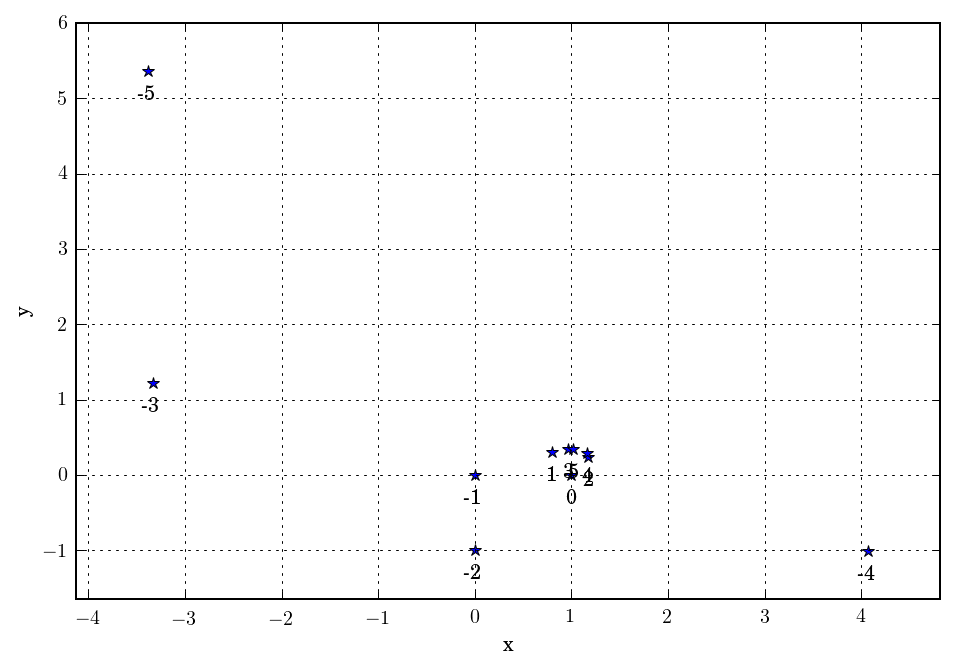

In [4]:
solve_henon(firstindex = -5, numsteps = 10)

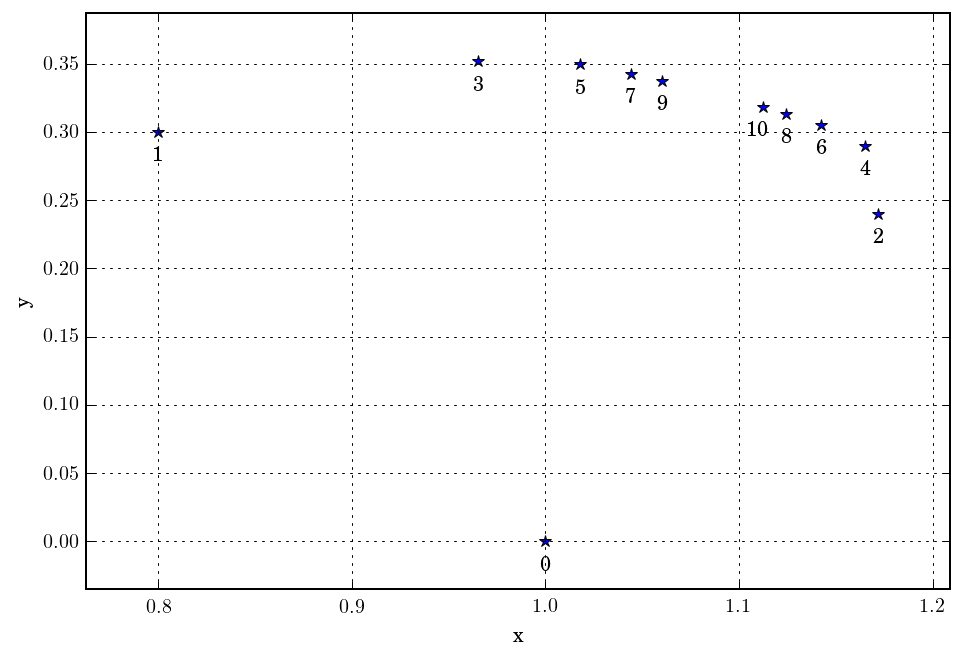

In [5]:
w = interactive(solve_henon, alpha = (0.0,1.0), beta = (0.0,1.0), firstindex = (-10,0), numsteps = (5,100), x0 = (-10,10), y0 = (-10,10))
ipcd.display(w);

## 1.2 Continuous-Time Systems
### 1.2.1 Nonautonomous Systems
$$\dot{\mathbf{x}}=\mathbf{F}(\mathbf{x},t)$$

$$x \in \mathcal{R}^n, t \in \mathcal{R}$$

- $\mathbf{F}$ depends explicitly on $t$. 
- $\mathbf{x}$ is the state vector
- $\mathcal{R}^n$ is the state space within which $\mathbf{x}$ evolves
- $\mathcal{R}^n + \mathcal{R}^1$ is the extended state space (includes $t$)
- If $\mathbf{F}$ is linear, $\mathbf{x}$ is a linear vector field
- If $\mathbf{F}$ is nonlinear, $\mathbf{x}$ is a nonlinear vector field
- Graph of the solution in the extended space is the *integral curve*. 
- $\Gamma = \gamma(\mathbf{x}_0) = \gamma(\mathbf{x}_0)^-\cup\gamma^+(\mathbf{x}_0)$

#### Example 1.3
$$\ddot{x}+2 \mu \dot{x} + \omega^2 x = F \cos(\Omega t)$$
Define (let)
$$\dot{x}_1= x_2$$
$$\dot{x}_2 = -2 \mu \dot{x}_1 - \omega^2 x_1 + F \cos(\Omega t)$$

We can solve for $\mu = 2$, $\omega^2 = 8$, $\Omega = 2$, $F = 10$. 
$$x_1=e^{-2 t}\left[a \cos(2 t)+ b \sin(2t)\right]+0.5 \cos(2t)+\sin(2t)$$
$$x_2 = -2 e^{-2t} \left[(a-b)\cos(2t)+(a+b)\sin(2t)\right] - \sin(2t)+2\cos(2t)$$

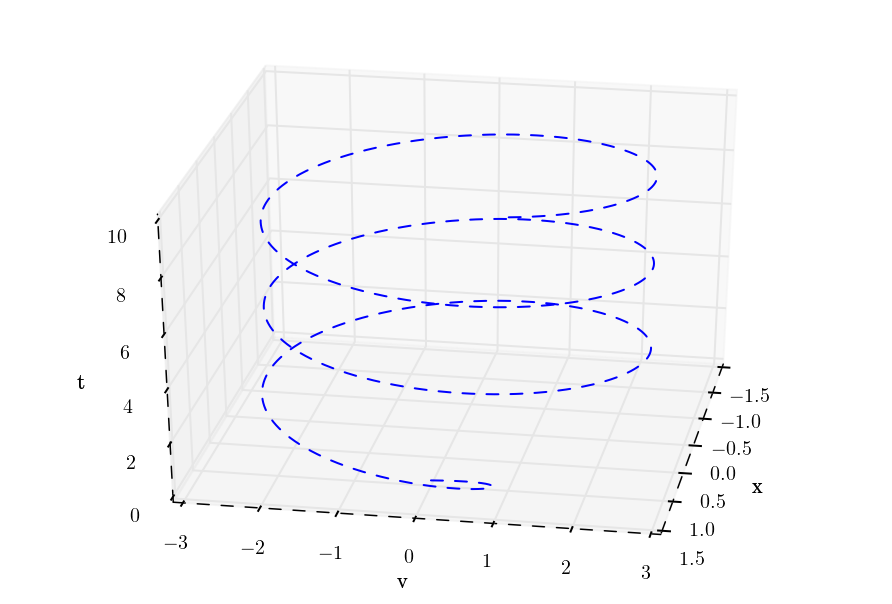

In [6]:
def solve_sdof_plot(max_time=10.0, omega = 2.8284, Omega = 2, mu = 2, F = 10, elevation = 30, angle = 10, x0 = 1, v0 = 0):
    _, _, _ = solve_sdof(max_time = max_time, omega = omega, mu = mu, elevation = elevation, angle = angle)
    return
w = interactive(solve_sdof_plot, max_time=(0,30.0), omega = (1, 10), mu =(0.0,2.0), elevation = (-90, 90), angle = (0,360));
ipcd.display(w);

Phase diagram

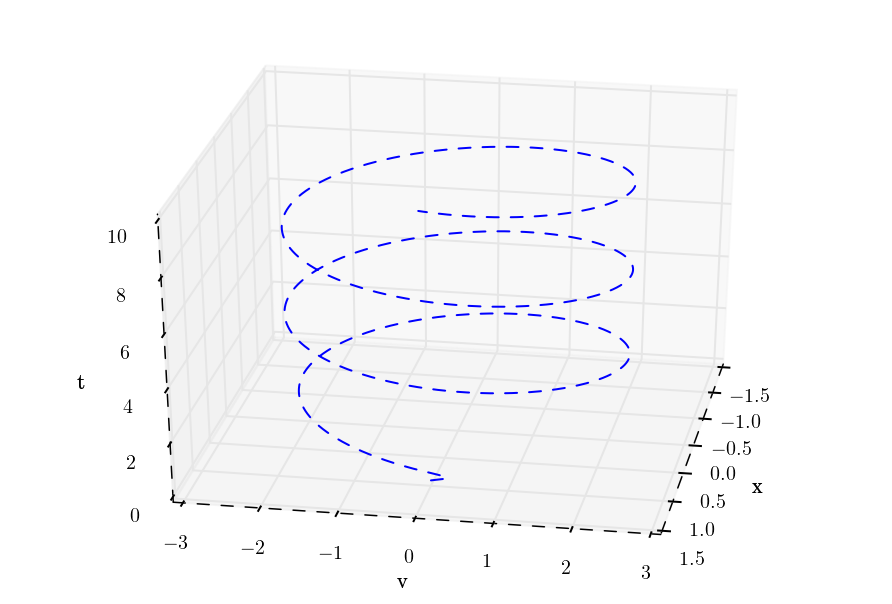

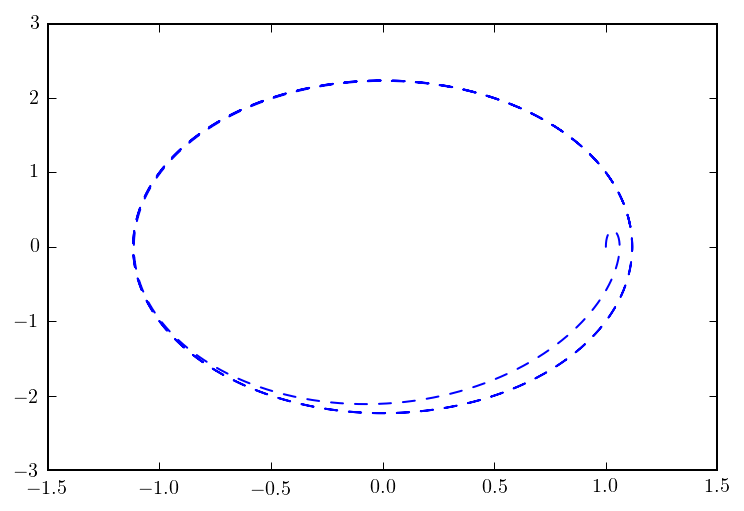

In [7]:
t, x, v = solve_sdof()
plt.plot(x,v);

Positive orbit of $x$

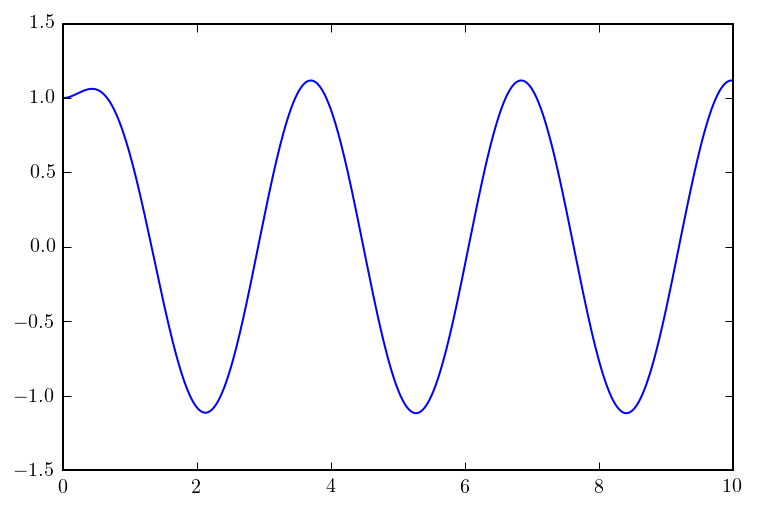

In [8]:
plt.plot(t, x,'-');

Positive Orbit of $v$

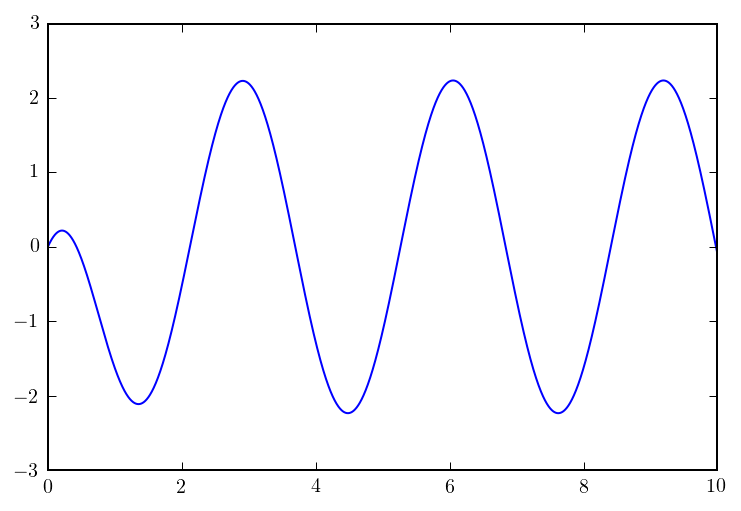

In [9]:
plt.plot(t, v, '-');

- If components of $\mathbf{F}(\mathbf{x},t;\mathbf{M})$ are $\mathcal{C}^0$ in $D$, then $\mathbf{x}(t,\mathbf{x}_0,t_0)$ 
exists in a small interval around $\mathbf{x}_0$. 

- If components of $\mathbf{F}$ are $\mathcal{C}^1$ in $D$, then $\mathbf{x}(t,\mathbf{x}_0,t_0)$ 
*is unique* in a small interval around $\mathbf{x}_0$. 

- If existence and uniqueness of a solution are ensured, then the system is *deterministic*.

- If components of $\mathbf{F}$ are $\mathcal{C}^r$ functions of $\mathbf{x}$ and $\mathbf{M}$  then the solution is also $\mathcal{C}^r$ function of $t$, $t_0$, $\mathbf{x}$ and $\mathbf{M}$ around $\mathbf{x}_0$ ($t_0$).

#### Example 1.4
Consider the previous example starting from different initial conditions:

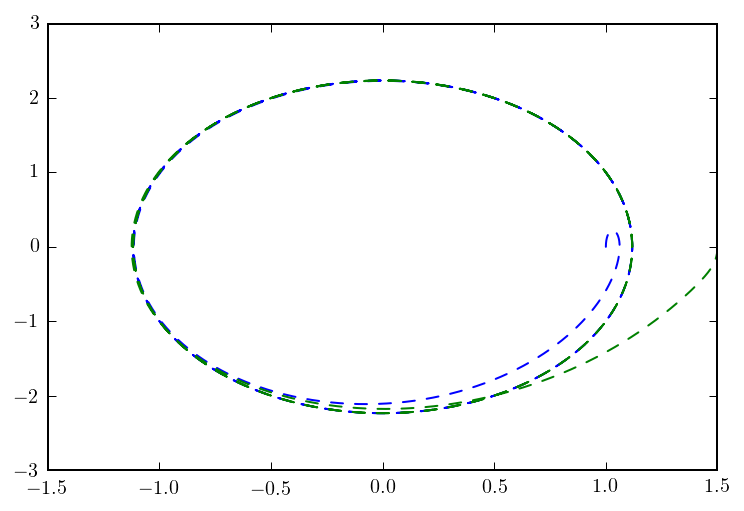

In [10]:
t, x1, v1 = solve_sdof(plotnow = 0)
t, x2, v2 = solve_sdof(plotnow = 0, x0 = 1.5)
ax = plt.plot(x1,v1,x2,v2)

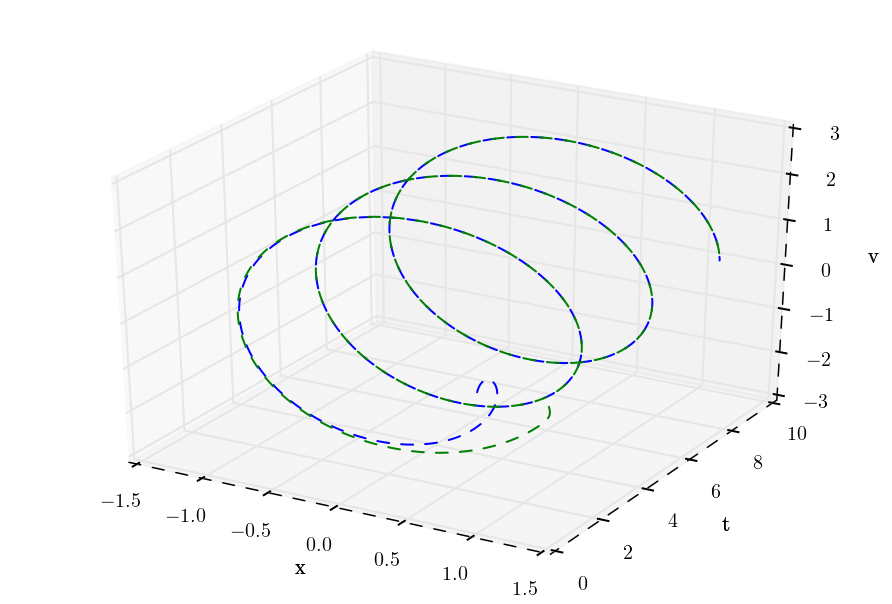

In [11]:
fig = plt.figure();
ax = fig.add_axes([0, 0, 1, 1], projection='3d');
plt.plot(x1,t,v1);
plt.plot(x2,t,v2);
plt.xlabel('x');
plt.ylabel('t');
ax.set_zlabel('v');

Note that the responses of the system converge to the same solution. 

### 1.2.2 Autonomous systems
$$\mathbf{F}(\mathbf{x};\mathbf{M})$$

- *Not* explicitly a function of time.
- *Time invariant*, *time independent*, or *stationary*. 
    - The **model** is stationary, not the response!

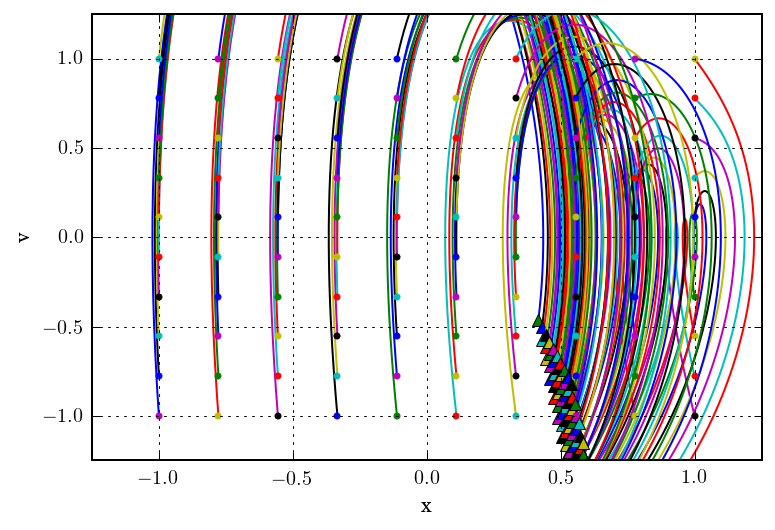

In [12]:
#def sdof_deriv(x1_x2, t, omega = 2.8284, mu = 2.828):
#    """Compute the time-derivative of a SDOF system."""
#    x1, x2 = x1_x2
#    return [x2, -omega**2*x1-2*mu*x2]
phase_plot(sdof_deriv);
plt.xlabel('x');
plt.ylabel('v');

Nonautonomous systems can be converted to autonomous systems by writing an additional equation. 
$$\dot{x}_1= x_2$$
$$\dot{x}_2 = -2 \mu \dot{x} - \omega^2 x + F \cos(\Omega t)$$

becomes
$$\dot{x}_1= x_2$$
$$\dot{x}_2 = -2 \mu \dot{x} - \omega^2 x + F \cos(\theta)$$
$$\dot{\theta} = \Omega$$
where $\theta = \Omega t$.

### 1.2.3 Phase Portraits and Flows
- A *phase portrait* is a collection of trajectories (solutions) of the equations. 
- Illustrate coalescence, or absence, of solutions. 

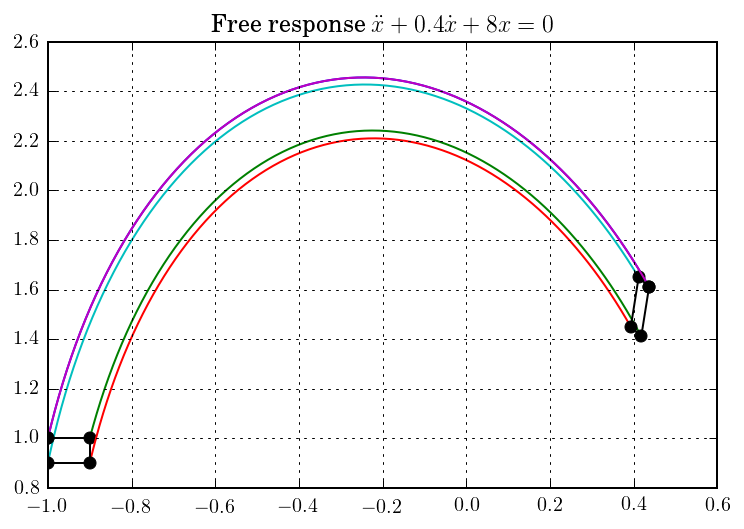

In [13]:
flow_plot(sdof_deriv, max_time = .7, args = (2.8284, 2,  .4,  0,  10))
plt.title('Free response $\\ddot{x}+0.4\\dot{x}+8x = 0$');

## 1.3 Attracting sets
- Note the prior system. 
    - If $\mu > 0$, the corresponding area swept decreases over time. This is called *dissipation*. 
    - If $\mu = 0$, the area is conserved. The flow *conserves* area.
    - If $\mu < 0$, we have expansion. 

Let's take a page from  Fluid Dynamics

Consider a small area (smaller than our starting area) $\Delta S$. The associated change in volume over time is 
$$\mathbf{v} \Delta t \cdot \mathbf{n} \Delta S$$
where $\mathbf{v} = \mathbf{\dot{x}} = \mathbf{F}$. $\mathbf{n}$ is the outward normal vector of $S$. 

The total change in volume is

$$\Delta V = \Delta t \int \int_S \mathbf{F} \cdot \mathbf{n} dS$$

From the divergence theorem

$$\int\int_S \mathbf{F} \cdot \mathbf{n} dS = \int\int\int_V(\nabla\cdot\mathbf{F})dV$$



For an infinitessimally small $V$, the right hand side is simply $(\nabla\cdot\mathbf{F})V$. Therefore:
$$\frac{1}{V}\frac{d V}{d t} = \nabla\cdot\mathbf{F}$$
So, a flow is dissipative/conservative/expanding based on the divergence of the vector field. 

For a conservative system:
$$\sum_{i=1}^n \frac{\partial F_i(\mathbf{x})}{\partial x_i}=0$$
For a dissipative system
$$\sum_{i=1}^n \frac{\partial F_i(\mathbf{x})}{\partial x_i}<0$$

In mechanics we often encounter *Hamiltonian Systems* which are governed by
$$\dot{q}_i=\frac{\partial H}{\partial p_i}$$
$$\dot{p}_i = - \frac{\partial H}{\partial q_i}$$
Where $H$ is the *Hamiltonian*. The divergence of the vector field for such systems is.
$$\nabla \cdot \mathbf{F} = \sum_{i=1}^n\left[\frac{\partial}{\partial q_i}\left(\frac{\partial H}{\partial p_i}\right)+ \frac{\partial}{\partial p_i}\left(-\frac{\partial H}{\partial q_i}\right) \right]=0$$

This is why Hamilton's principle works for conservative systems. Preservation of flow (volumes) in Hamiltonian systems is called the *Liouville theorem*.

- *Attracting sets*: dissipating systems draw trajectories from varied initial conditions to a subspace of the state space.

- *Invariant set*: A set $\mathbf{P} \subset \mathcal{R}^n$ is invariant if for any initial condition $\mathbf{x}(t=t_0)\in\mathbf{P}$ we have $\mathbf{x}(t)\in\mathbf{P}$. 

#### Example 1.7 
Back to our favorite system:
$$\dot{x}_1= x_2$$
$$\dot{x}_2 = -2 \mu \dot{x} - \omega^2 x$$

$$\frac{\partial F_1}{\partial x_1}\cdot n_{x_1}+ \frac{\partial F_2}{\partial x_2}\cdot n_{x_2}= 0+ - 2 \mu = -2 \mu$$
So, if $\mu>0$, the system is dissipative (locally). 


#### Example 1.8 
Back to our favorite system:
$$\dot{x}_1= x_2$$
$$\dot{x}_2 = -2 \mu \dot{x} - \omega^2 x- F \cos(\theta)$$
$$\dot{\theta} = \Omega$$

$$\frac{\partial F_1}{\partial x_1}\cdot n_{x_1}+ \frac{\partial F_2}{\partial x_2}\cdot n_{x_2}+\frac{\partial F_3}{\partial \theta}\cdot n_{x_2}= 0+ - 2 \mu + 0= -2 \mu$$
So, if $\mu>0$, the system is dissipative (locally) (still). 


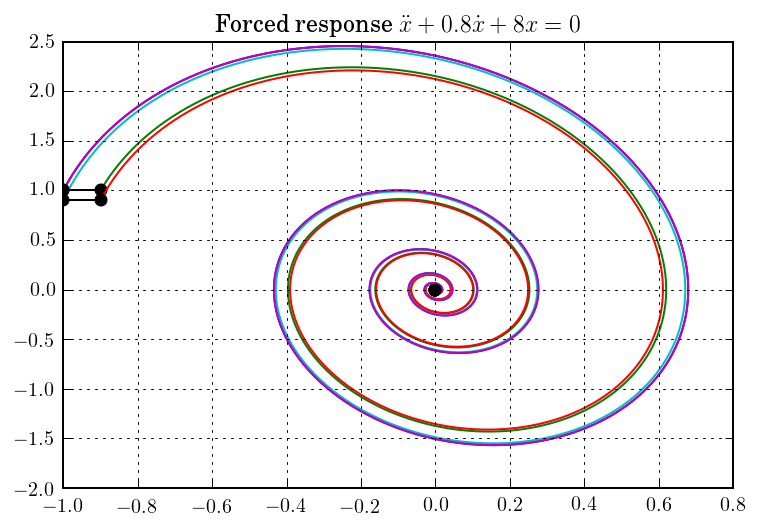

In [14]:
flow_plot(sdof_deriv, max_time = 100, args = (2.8284, 2,  0.4,  0,  10))
plt.title('Forced response $\\ddot{x}+0.8\\dot{x}+8x = 0$');

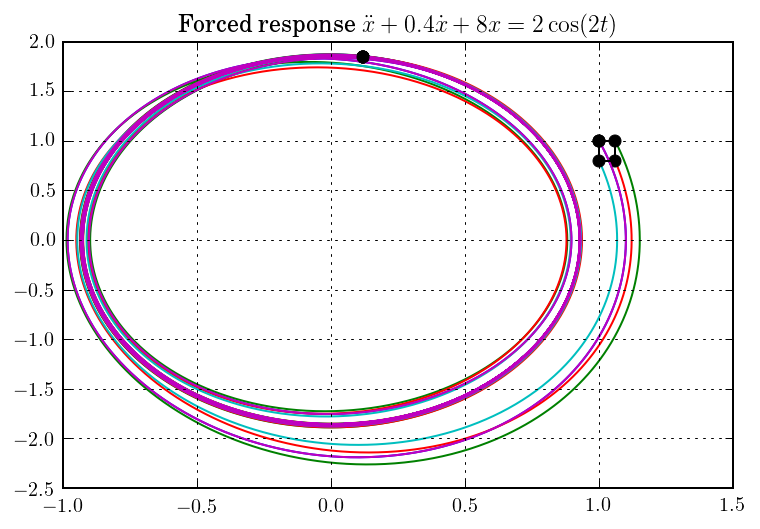

In [15]:
flow_plot(sdof_deriv, max_time = 100, args = (2.8284, 2,  .4,  4,  10),x0 = sp.array([[1, 1.06 , 1.06, 1, 1]]).T, v0 = sp.array([[1, 1, 0.8, 0.8, 1]]).T)
plt.title('Forced response $\\ddot{x}+0.4\\dot{x}+8x = 2\\cos(2 t)$');

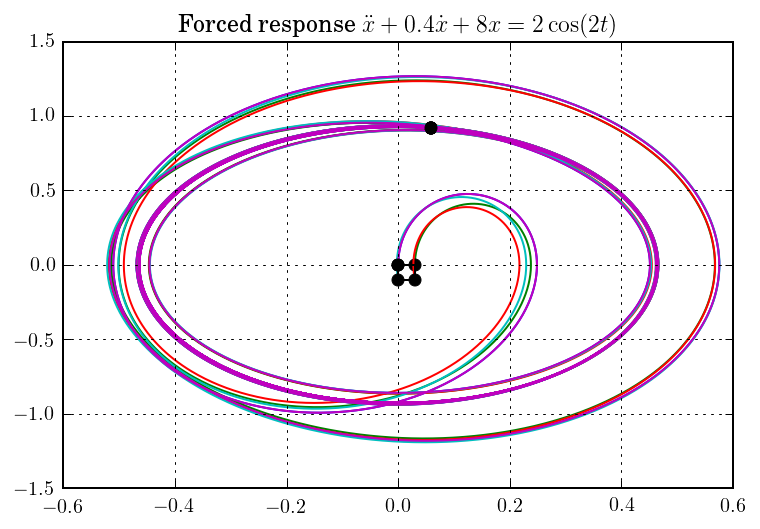

In [16]:
flow_plot(sdof_deriv, max_time = 100, args = (2.8284, 2,  .4,  2,  10),x0 = sp.array([[0, 0.03 , 0.03, 0, 0]]).T, v0 = sp.array([[0, 0, -0.1, -0.1, 0]]).T)
plt.title('Forced response $\\ddot{x}+0.4\\dot{x}+8x = 2\\cos(2 t)$');

Similar applies to maps. A map is dissipative if 
$$\left|\text{det} D_{\mathbf{x}_k}\mathbf{F}\right|<1$$
#### Example 1.9
Henon map

$$\text{det} D_{\mathbf{x}_k}\mathbf{F} = 
\text{det} \begin{bmatrix}-2 \alpha x_k&1\\ \beta & 0\end{bmatrix} = -\beta$$
Hence if $|\beta|< 1$, the Henon map is dissipative for all $x_k$. The area is contracted by $|\beta|$ at each iteration. 

## 1.4 Concepts of Stability

### 1.4.1 Lyapunov Stability

#### Maps
A solution $\mathbf{u}_k$ of a map is considered *Lyapunov stable* if, given a small number $\epsilon>0$, there exists a number $\delta=\delta(\epsilon)>0$  such that any other solution $\mathbf{v}_k$ for which $||\mathbf{u}_k - \mathbf{v}_k||<\delta$ at $k=m$ ($m$ is "time zero") satisfies $||\mathbf{u}_k - \mathbf{v}_k||<\epsilon$ for all $k>m$, where $k$ and $m$ $\in$ $\mathcal{Z}^+$.

In layman's terms: two unique orbits of a map initiated from nearby locations at the same time  have to remain close for all future times. Close is subjective. Bounded is the cleaner definition ($<\delta$).

#### Example 1.10
Consider the map of example 1.2
\begin{equation}
x_{x+1} = 4 \alpha x_k (1-x_k)
\end{equation}
where $\alpha = 0.5$.

Initiating at $x_k=0.5$, the orbit is
$$\{0.5, 0.5, 0.5, \cdots, 0.5\}$$

Starting instead at $0.4$ yields an orbit of 
$$\{0.4, 0.48, 0.4992, 0.49999872, 0.5, \cdots, 0.5\}$$
Thus they stay close and converge. This is an illustration that $0.5$ is likely a stable solution of the map. (for confidence we should also consider starting at $0.51$).

#### Continuous-Time systems
A solution $\mathbf{u}(t)$ of a map is considers *Lyapunov stable* if, given a small number $\epsilon>0$, there exists a number $\delta=\delta(\epsilon)>0$  such that any other solution $\mathbf{v}(t)$ for which $||\mathbf{u}_k - \mathbf{v}_k||<\delta$ at $t=t_0$ satisfies $||\mathbf{u}_k - \mathbf{v}_k||<\epsilon$ for all $t>t_0$, where $k$ and $m$ $\in$ $\mathcal{Z}^+$.

In layman's terms: two unique solutions started from nearby locations at the same time  have to remain close for all future times. Close is subjective. Bounded is the cleaner definition ($<\delta$).

In autonomous systems Lyapunov stability is known as *uniform stability* because $\delta$ is independent of the initial time $t_0$. 

#### Example 1.11: The Duffing Oscillator

$$\ddot{x}+2\mu \dot{x}+x-\alpha x^3=0$$
which in state space form is
$$\dot{x}_1 = x_2$$
$$\dot{x}_2= -x_1 + \alpha x_1^3 - 2 \mu x_2$$

There is some non-dimensionalizing that we can do that allows us to seemingly ignore the linear natural frequency. Just trust me for now. 

First consider when $\mu=0$. 

Let's look for steady state solutions:
$$0 = x_2$$
$$0 = -x_1 + \alpha x_1^3 - 2 \mu x_2$$
From the first expression, steady-state only happens when $x_2=0$. 
From the second, for $\alpha = 1$ we have 
$$x_1=x_1^3$$ 
which has 3 solutions, -1, 0, and 1. So, we have 3 steady state solutions: (0,-1), (0,0), and (0,1). For general $\alpha$ we have $(0,-\frac{1}{\sqrt{\alpha}})$, (0,0), and $(0,\frac{1}{\sqrt{\alpha}})$.

Near (0,0), the orbits are closed curves that surround it. Not strictly true for the others.


In [17]:
# This has been superceeded by the phase plot function in Nonlinear_Dynamics
help(phase_plot)
def solve_duffing(max_time=1.0, mu = .1, x0 = sp.array([[-1, -.9 , -0.9, -1, -1]]).T, v0 = sp.array([[1, 1, .9, 0.9, 1]]).T, alpha = 1, plotnow = 1):
    
    def duff_deriv(x1_x2, t, alpha = alpha, mu = mu):
        """Compute the time-derivative of a SDOF system."""
        x1, x2 = x1_x2
        return [x2, -x1-2*mu*x2 + alpha * x1**3]

    x0 = sp.concatenate((x0, v0), axis = 1)
    N = x0.shape[0]
    # Solve for the trajectories
    t = sp.linspace(0, max_time, int(250*max_time))
    x_t = sp.asarray([sp.integrate.odeint(duff_deriv, x0i, t)
                      for x0i in x0])

    if plotnow == 1:
        for i in range(N):
            x, v = x_t[i,:,:].T            
            plt.plot(x, v,'-')
            #Let's plot '*' at the end of each trajectory.
            plt.plot(x[-1],v[-1],'*')
        plt.grid('on')
    # Just in case we want to pull and plot.        
    return t, x_t

Help on function phase_plot in module __main__:

phase_plot(func, max_time=1.0, numx=10, numv=10, spread_amp=1.25, args=(), span=(-1, 1, -1, 1))
    Plot the phase plane plot of the function defined by func.
    
    Parameters
    -----------
    func : string like
           name of function providing state derivatives
    max_time : float, optional
               total time of integration
    numx, numy : floats, optional
                 number of starting points for the grid of integrations
    spread_amp : float, optional
                 axis "growth" for plotting, relative to initial grid
    args : float, other
           arguments needed by the state derivative function
    span : 4-tuple of floats, optional
           (xmin, xmax, ymin, tmax)



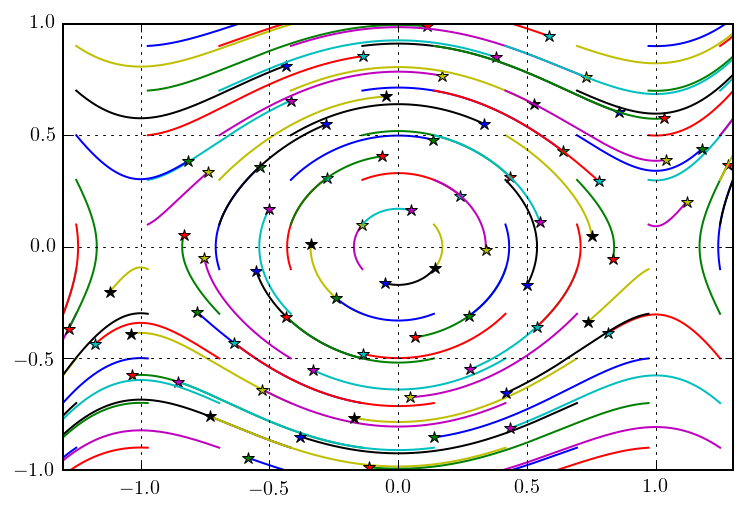

In [18]:
# Make a grid of starting points
numx = 10
numv = 10
x = sp.linspace(-1.25, 1.25, numx)
v = sp.linspace(-0.9, 0.9, numv)
x0, v0 = sp.meshgrid(x, v)
x0.shape = (numx*numv,1) # Python array trick to reorganize numbers in an array
v0.shape = (numx*numv,1) # The matrices are now "vectors" (1 column)
_,_ = solve_duffing(max_time=1.25, mu = 0.0, x0 = x0, v0 = v0, alpha = 1)
plt.axis((-1.3,1.3,-1,1));

#### A couple of longer runs

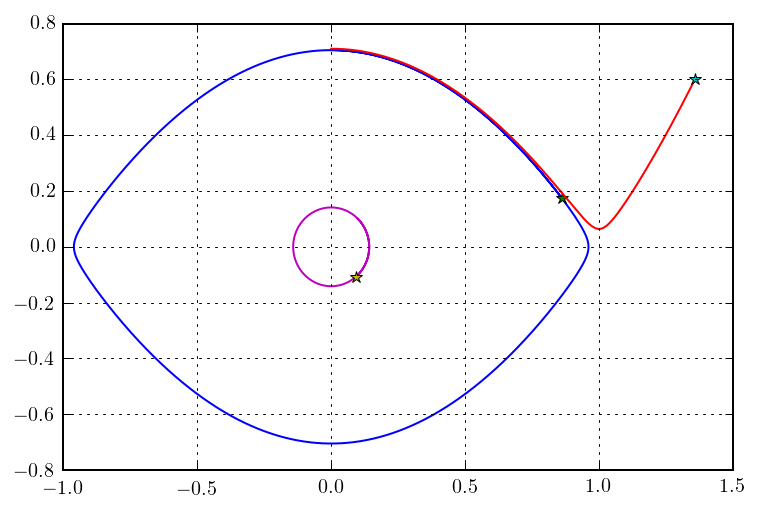

In [19]:
t, x1 = solve_duffing(max_time=15, mu = 0.0, x0 = sp.array([[0]]), v0 = sp.array([[0.705]]).T, alpha = 1)
t, x2 = solve_duffing(max_time=5, mu = 0.0, x0 = sp.array([[0]]), v0 = sp.array([[0.71]]).T, alpha = 1)
t, x2 = solve_duffing(max_time=8, mu = 0.0, x0 = sp.array([[0.1]]), v0 = sp.array([[0.1]]).T, alpha = 1)

What's going on in the middle?

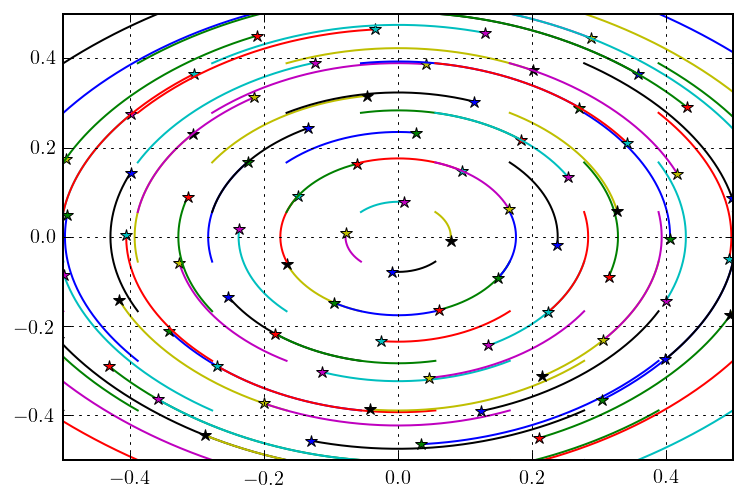

In [20]:
x = sp.linspace(-0.5, 0.5, numx)
v = sp.linspace(-0.5, 0.5, numv)
x0, v0 = sp.meshgrid(x, v)
x0.shape = (numx*numv,1)
v0.shape = (numx*numv,1)
_,_ = solve_duffing(max_time=0.9, mu = 0, x0 = x0, v0 = v0, alpha = 1)
plt.axis((-0.5,0.5,-0.5,0.5));

So, for in an $\epsilon = \sqrt{x^2+v^2}$ in the neighborhood of (0,0), we can find $\sqrt{x_0^2+v_0^2}<\delta$ such that the system is Lyapunov stable. 

What about in the neighborhood of $(1,0)$?

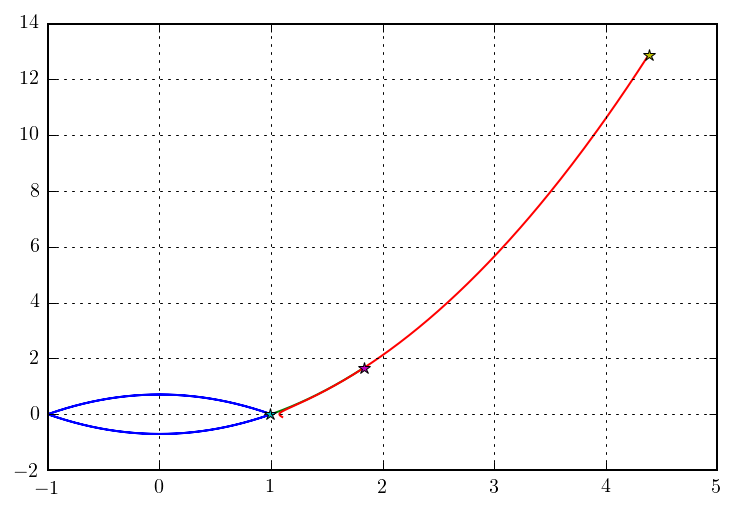

In [21]:
t, x1 = solve_duffing(max_time=45, mu = 0.0, x0 = sp.array([[0.999]]), v0 = sp.array([[0]]).T, alpha = 1, plotnow = 0)
t, x2 = solve_duffing(max_time=5, mu = 0.0, x0 = sp.array([[1.001]]), v0 = sp.array([[0]]).T, alpha = 1, plotnow = 0)
t, x3 = solve_duffing(max_time=3, mu = 0.0, x0 = sp.array([[1.1]]), v0 = sp.array([[-.1]]).T, alpha = 1, plotnow = 0)
plt.plot(x1[0,:,0],x1[0,:,1],'-', x2[0,:,0],x2[0,:,1],'-', x3[0,:,0],x3[0,:,1],'-')
plt.plot(x1[0,-1,0],x1[0,-1,1],'*',x2[0,-1,0],x2[0,-1,1],'*',x3[0,-1,0],x3[0,-1,1],'*')
plt.grid('on')

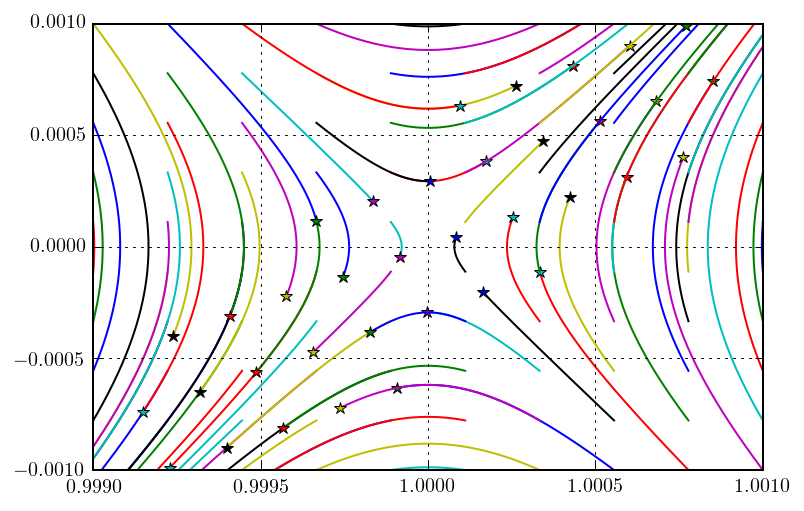

In [22]:
x = sp.linspace(.999, 1.001, numx)
v = sp.linspace(-0.001, 0.001, numv)
x0, v0 = sp.meshgrid(x, v)
x0.shape = (numx*numv,1)
v0.shape = (numx*numv,1)
_,_ = solve_duffing(max_time=0.9, mu = 0, x0 = x0, v0 = v0, alpha = 1)
plt.axis((.999, 1.001, -0.001, 0.001));

No $\delta$ exists such that $\epsilon$ will be bound for all time. Thus $(1,0)$ is not uniformly stable, or stable in the Lyapunov sense.

### 1.4.2 Asymptotic Stability 

#### Maps
A solution of a map is stable if
$$\underset{k \to\infty}{\text{lim}}\lVert\mathbf{u}_k-\mathbf{v}_k\rVert\to 0$$
#### Example 1.12
For $$x_{k+1} = 4 \alpha x_k (1-x_k)$$
$0.5$ is Lyapunov stable. It is also asymptotically stable (as illustrated earlier) because the separation between $u_0 = 0.5$ and $v_0=0.4$ goes to $0$ as $k\to \infty$.
#### Continuous systems 
Consider the Duffing Oscillator with $\mu>0$. It is asymptotically stable in the vicinity of $(0,0)$.


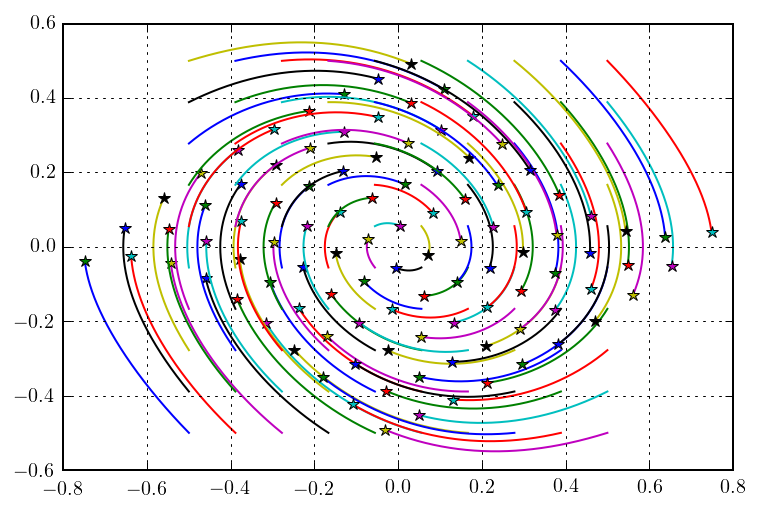

In [23]:
x = sp.linspace(-0.5, 0.5, numx)
v = sp.linspace(-0.5, 0.5, numv)
x0, v0 = sp.meshgrid(x, v)
x0.shape = (numx*numv,1)
v0.shape = (numx*numv,1)
max_time=0.9
_,_ = solve_duffing(mu = .2, x0 = x0, v0 = v0)
#plt.axis((-0.5,0.5,-0.5,0.5))

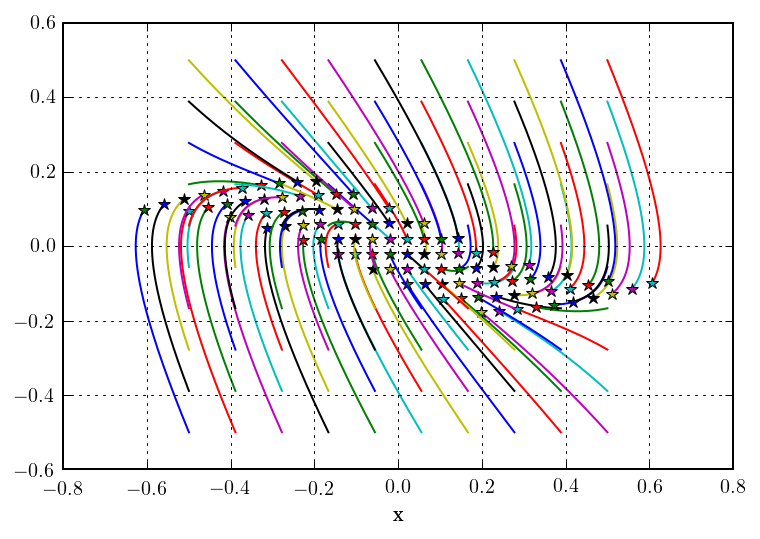

In [24]:
def interactive_duff(mu):
    _,_ = solve_duffing(mu = mu, x0 = x0, v0 = v0)
    return
w = interactive(interactive_duff, mu = (0.00,2.00))
ipcd.display(w);
plt.xlabel('x')

### 1.4.3 Poincaré Stability

- Prior definition of stability can be overly restrictive. 
- Consider the closed form solution of the duffing oscillator when $\mu=0$.
$$x\approx a \cos\left[\left(1 - \frac{3}{8} a^2\right) t+\beta  \right]$$
- Frequency of oscillation $\omega = \left(1 - \frac{3}{8} a^2\right)$ depends on $a$. Thus, two solutions may start very close, yet still diverge substantially. 

#### Example: Consider starting points 'o', later points '*', simulated for 7.5 sec.

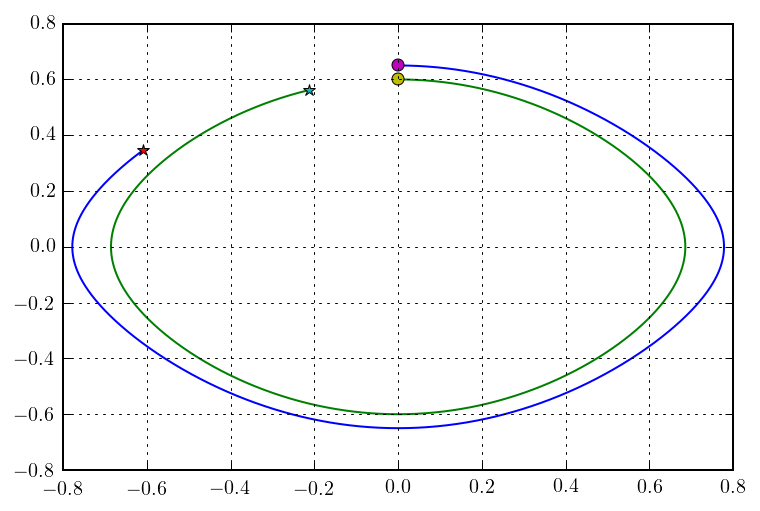

In [25]:
t, x1 = solve_duffing(max_time=7.5, mu = 0.0, x0 = sp.array([[0.0]]), v0 = sp.array([[0.65]]).T, alpha = 1, plotnow = 0)
t, x2 = solve_duffing(max_time=7.5, mu = 0.0, x0 = sp.array([[0.0]]), v0 = sp.array([[0.6]]).T, alpha = 1, plotnow = 0)
plt.plot(x1[0,:,0],x1[0,:,1],'-', x2[0,:,0],x2[0,:,1],'-')
plt.plot(x1[0,-1,0],x1[0,-1,1],'*',x2[0,-1,0],x2[0,-1,1],'*')
plt.plot(x1[0,0,0],x1[0,0,1],'o',x2[0,0,0],x2[0,0,1],'o')
plt.grid('on')

Clearly the inner orbit is *outracing* the outer orbit. This doesn't happen in linear systems. 

**Orbital stability** (Poincaré): An orbit $\Gamma_1$ is *orbitally stable* if, given a small number $\epsilon >0$, there exists a $\delta = \delta(\epsilon)>0$ such that if $\lVert\mathbf{u}(t=0)-\mathbf{v}(t=\tau)\rVert$ for some $\tau$, then there exist $t_1$ and $t_2$ for which $\lVert\mathbf{u}(t_1)-\mathbf{v}(t_2)\rVert<\epsilon$. Further, if $\Gamma_2\to\Gamma_1$ as $t\to\infty$, then $\Gamma_1$ is asymptotically stable. 

- For Poincaré stability, we examine how *close* orbits are in the state space.

### 1.4.4 Lagrange Stability (Bounded Stability)

A solution of a map is *boundedly stable* if $\lVert\mathbf{u}_k\rVert\leq L$ for all $k\in \mathcal{Z}$, where $L$ is a finite positive quantity.

A solution $\mathbf{u}(t)$ of a continuous-time system  is *boundedly stable* if $\lVert\mathbf{u}(t)\rVert\leq L$ for all $t$, where $L$ is a finite positive quantity.


### 1.4.5 Stability through Lyapunov Function

- Define some equilibrium location $\mathbf{x} = \mathbf{x}_0$.
- Assume there is a $\mathcal{C}^1$ scalar function

$V(\mathbf{x};\mathbf{M})$ in the neighborhood of $\mathbf{x}_0$ such that:
- $V(\mathbf{x}_0;\mathbf{M}) = 0$
- $V(\mathbf{x};\mathbf{M}) >0$ for $\mathbf{x} \neq \mathbf{x}_0$ 

The function $V$ is called a **Lyapunov Function**. The derivative of $V$ along the curves of $\dot{\mathbf{x}}=\mathbf{F}(\mathbf{x};\mathbf{M})$ is $\dot{V} = \nabla  V\cdot \mathbf{F} =\nabla V^T\mathbf{F} $

- If $\dot{V}\leq 0$ in the chosen neighborhood of $\mathbf{x}_0$, then $\mathbf{x}_0$ is **stable**.
- If $\dot{V}< 0$ in the chosen neighborhood of $\mathbf{x}_0$, then $\mathbf{x}_0$ is **asymptotically stable**.

- For mechanical systems, we often use the mechanical energy. 
- For Hamiltonian systems, the Hamiltonian may be used. 
- For general systems, there are no general methods that work. 

#### Example 1.14

Consider the Duffing Oscillator with $a = 1$. 

$$V(x_1,x_2) = V(x,v) = \frac{1}{2} x_2^2+\frac{1}{2}x_1^2-\frac{1}{4}x_1^4$$

Note that $V(0,0) = 0$ amd $V(x_1,x_2)>0$ in the region immediately surrounding $(0,0)$. 

$$\nabla V^T = \left(\frac{\partial V}{\partial x_1}, \frac{\partial V}{\partial x_2} \right)$$

Thus

$$\dot{V} = \nabla V^T \mathbf{F} = \frac{\partial V}{\partial x_1}F_1+ \frac{\partial V}{\partial x_2}F_2$$
Substituting yields
$$\dot{V} = \left(x_1 - x_1^3 \right) x_2 + x_2 \left(-x_1 + x_1^3 - 2 \mu x_2\right) = -2 \mu x_2^2$$

Because $\dot{V}\leq 0 $ for $\mu>0$, this solution is stable according to Lyapunov's first stability theorem. (*Not asymptotically stable.*)

This also highlights a shortcoming of this method. Via a variety of other methods, we can show that it is actually asymptotically stable. 

Lyapunov's second theorem is sufficient, but not necessary, for asymptotic stability. 

**Krasovskii's theorem**
Consider the domain $D_\ell$:
$$D_\ell = \left\{\mathbf{x}\vert V(\mathbf{x})\leq \ell\right\}$$
$$V(\mathbf{x})>0 \, \text{for} \, \mathbf{x}\in D_\ell \, \text{and} \, \mathbf{x}\neq \mathbf{x}_0$$
$$\dot{V}(\mathbf{x})\leq 0 \, \text{for}\,\mathbf{x}\in\,D_\ell$$

If there is no solution $\mathbf{x}^*(t)$ for $\dot{\mathbf{x}} = \mathbf{F}(\mathbf{x};\mathbf{M}_0)$, other than $\mathbf{x}_0$, which lies completely in $D_\ell$ and for which $\dot{V}(\mathbf{x}^*(t))\equiv0$, then every solution that starts in $D_\ell$ tends to $\mathbf{x}_0$ at $t\to\infty$. 

For example, 
$$V(x_1,x_2) = V(x,v) = \frac{1}{2} x_2^2+\frac{1}{2}x_1^2-\frac{1}{4}x_1^4$$
and taking $D_\ell$ to be the region 
$$ \frac{1}{2} x_2^2+\frac{1}{2}x_1^2-\frac{1}{4}x_1^4<\frac{1}{4}$$
one can show that all the conditions of Kraskovskii's theorem are satisfied and hence the origin is an asymptotically stable equilibrium and that $D_\ell$ is within the domain of attraction of the origin. 

## 1.5 Attractors
Asympotically stable solutions are called *attractors*. 

In general, let $T^t$ represent an evolution operator that acts on initial consitions $\mathbf{x}_0$ in $\mathcal{R}^n$ such that $T^t \mathbf{x}_0 = \mathbf{x}(\mathbf{x}_0,t)$  where $\mathbf{x}\in\mathcal{R}^n$. Repeated applications of $T^t$ may take one to a subspace of $\mathcal{R}^n$ called an attractor.

1. **Invariance**: An attractor $X$ is an invariant set of the flow of the system. Formally, $T^t X \in X$.
2. **Attractivity**: There exists in the neighborhood $U$ of the attractor (i.e., $X \subset U$) such that evolutions initiated in $U$ remain in $U$ and approach $X$ as $t\to\infty$.  Further, $T^t U \in U$ and $T^t U \to X$ as $t\to\infty$. 
3. **Recurrence**: Trajectories initiated from a state in an open subset of $X$ repeatedly come arbitrarily close to this initial state for arbitrarily large values of time. 
4. **Indecomposability**: An attractor cannot be split up into two non-trivial pieces. 


- Property 3 rules out unstable solutions. 
- Property 4 is also known as *irreducibility* implies that an attractor cannot be broken down into two distinct smaller attractors. 
- All attracting *sets* possess the first to properties. Only some attracting sets possess 3 and 4. 
    - Some unstable solutions can be part of an attracting set.
    - More than one attractor can be part of an attracting set. 

The following satisfies 1.-4. and is a point attractor.


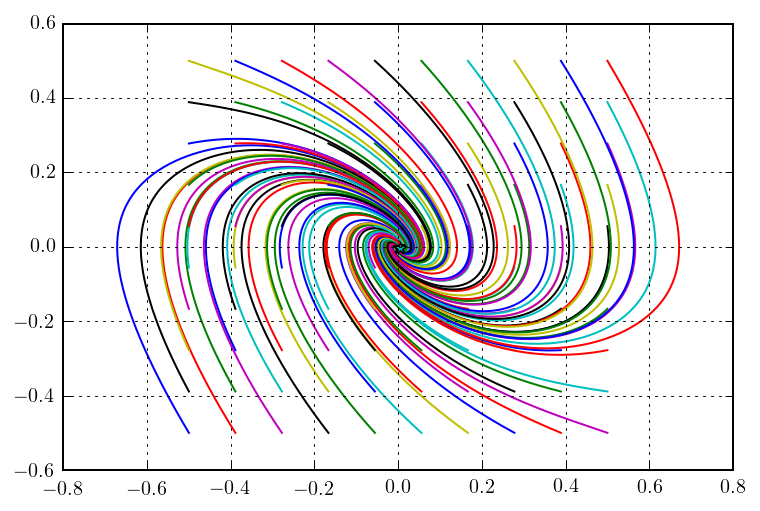

In [26]:
def interactive_duff(mu):
    _,_ = solve_duffing(max_time = 10.0, mu = mu, x0 = x0, v0 = v0)
    return
w = interactive(interactive_duff, mu = (0.03, 1.10))
ipcd.display(w);

The following (previous example) is a *periodic attractor*.

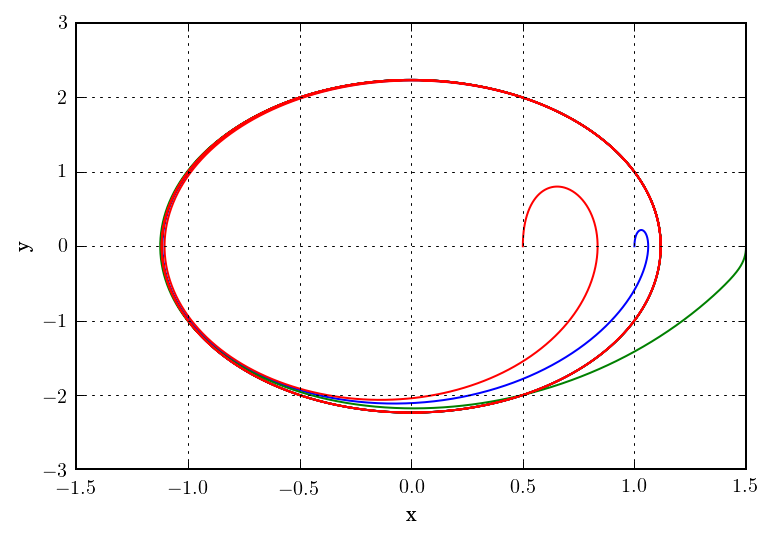

In [27]:
t, x1, v1 = solve_sdof(plotnow = 0)
t, x2, v2 = solve_sdof(plotnow = 0, x0 = 1.5)
t, x3, v3 = solve_sdof(plotnow = 0, x0 = 0.5)
ax = plt.plot(x1,v1,'-',x2,v2,'-',x3,v3,'-')
plt.xlabel('x');plt.ylabel('y')
plt.grid('on')

It is a *dynamic solution*.

Two other attractors are: *quasiperiodic* and *chaotic*.

A repellor is the opposite of an attractor. 

## Construction of Phase Planes (Nayfeh and Mook- 1979, section 2.2)

Consider equations of the form 
$$\ddot{x} + f(x)= 0$$

Multiplying by $\dot{x}$ and integrating with respect to time we get
$$\int\dot{x}\ddot{x}dt+\int f(x)\dot{x}dt = h$$
where $h$ is a constant. Since $\dot{x}=\frac{dx}{dt}$ and $\ddot{x}=\frac{d\dot{x}}{dt}$
$$\int\dot{x}d\dot{x}+\int f(x)dx = h$$
Performing the integration results in
$$\frac{1}{2}v^2+F(x) = h$$

where $v\equiv \dot{x}$ and $h$ is a constant. 

For mechanical systems:
- the first term is the kinetic energy
- the second term is the potential energy
- $h$ is the total mechanical energy. 

- If we plot lines of constant $h$ as a function of $x$ and $\dot{x}$, the results are the orbits in the phase plane. 
- The direction along the line can be ascertained by $v=\dot{x}$. 
- Clearly $x$ must be increasing if $v$ is positive. 

Next, solve for $v$
$$\frac{1}{2}v^2 = h - F(x)$$
Also note from the original equation that
$$\dot{v}=-f(x)$$
from which
\begin{align}
\frac{dt}{dx}\frac{dv}{dt}&=-\frac{dt}{dx}f(x)\\
\frac{dt}{dx}\frac{dv}{dt}&=-\frac{f(x)}{v}\\
\frac{dv}{dx}&=-\frac{f(x)}{v}
\end{align}
Thus, when $\frac{dv}{dx}=0$, $f(x) = 0$, and when $\frac{dv}{dx}= \infty$, $v=0$. 

When $f(x)=0$ and $v=0$, we are at a singular or equilibrium point.  

# Doodling Testing below

In [28]:
def square(num=1):
    print("{} squared is {}".format(num, num*num))
interact(square, num=5)


5 squared is 25


<function __main__.square>

In [29]:
@interact
def square(num=2):
    print("{} squared is {}".format(num, num*num))


2 squared is 4


In [30]:
# Path to matlab binary (not application) on my Mac
matlab = '/Applications/MATLAB_R2015a.app/bin/matlab'
%load_ext pymatbridge

Starting MATLAB on ZMQ socket ipc:///tmp/pymatbridge-1a336aaf-9e35-4464-9ffb-0a73c575bacd
Send 'exit' command to kill the server
.............MATLAB started and connected!


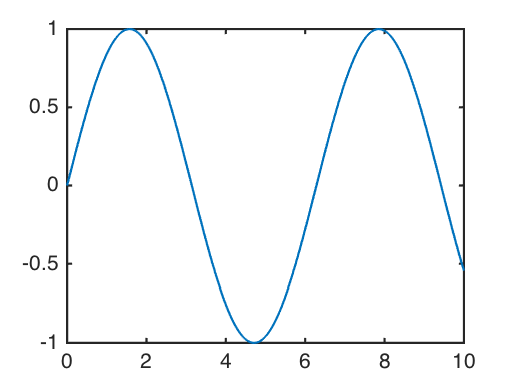

In [31]:
%%matlab
i=0:.01:10;
plot(i,sin(i))

# References

[<a id="cit-Nayfeh:1995" href="#call-Nayfeh:1995">1</a>] Ali Hasan Nayfeh and Balakumar Balachandran, ``_Applied nonlinear dynamics: analytical, computational, and experimental methods_'',  1995.  [online](http://www.loc.gov/catdir/bios/wiley041/94003659.html)

